## Axes and Subplots
reference:[https://matplotlib.org/3.8.1/users/explain/axes/index.html](https://matplotlib.org/3.8.1/users/explain/axes/index.html)

In [ ]:
# Creating Axes using plt.subplots()
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5, 2.5),
                        layout="constrained")
# for each Axes, add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                            transform=axs[row, col].transAxes,
                            ha='center', va='center', fontsize=18,
                            color='darkgrey')
fig.suptitle('plt.subplots()')

### Arranging multiple Axes in a Figure

In [ ]:
# 添加Axes的三种方法
# 1.  .add_axes()
import matplotlib.pyplot as plt
import numpy as np

w, h = 4, 3
margin = 0.5  # 边距
fig = plt.figure(figsize=(w, h), facecolor='lightblue')
ax = fig.add_axes([margin / w, margin / h, (w - 2 * margin) / w,
                      (h - 2 * margin) / h])

# 2.   .add_subplot()
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...

# 3.   subplot_mosaic()
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

fig, axd = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower left', 'lower right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

### Subfigures and Subplots

In [ ]:
#  .subfigures()
fig = plt.figure(layout="constrained")
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1.5, 1.])
axs0 = subfigs[0].subplots(2, 2)
subfigs[0].set_facecolor('lightblue')
subfigs[0].suptitle('subfigs[0]\nLeft side')
subfigs[0].supxlabel('xlabel for subfigs[0]')

axs1 = subfigs[1].subplots(3, 1)
subfigs[1].suptitle('subfigs[1]')
subfigs[1].supylabel('ylabel for subfigs[1]')

# nested list for .subplots_mosaic()
inner = [['innerA'],
         ['innerB']]
outer = [['upper left',  inner],
          ['lower left', 'lower right']]

fig, axd = plt.subplot_mosaic(outer, layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]')

## Placing Colorbars


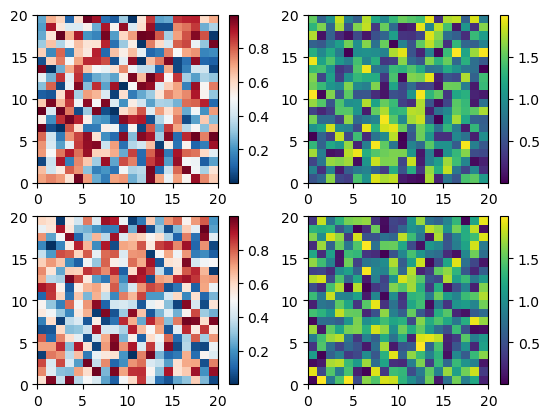

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        fig.colorbar(pcm, ax=ax)

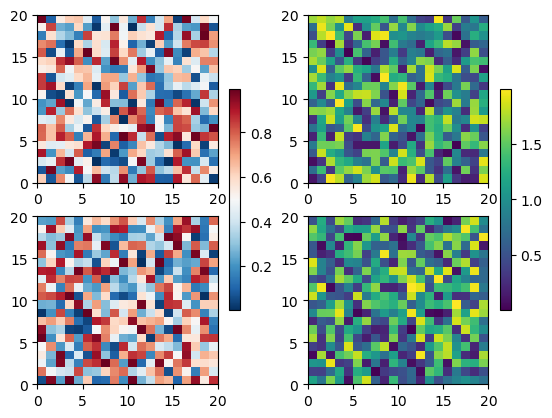

In [7]:
fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
    fig.colorbar(pcm, ax=axs[:, col], shrink=0.6) # ax=axs[:, col] 同一列的axs共用一个colorbar

In [ ]:
# Adjusting the spacing between colorbar and axes
fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(5, 5))
for ax, pad in zip(axs, [0.025, 0.05, 0.1]):
    pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
    fig.colorbar(pcm, ax=ax, pad=pad, label=f'pad: {pad}') # pad: 0.025, 0.05, 0.1 分别对应上面的三个ax的间距
fig.suptitle("layout='constrained'")

In [ ]:
fig, ax = plt.subplots(layout='constrained', figsize=(4, 4))
pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
ax.set_ylim([-4, 20])
cax = ax.inset_axes([0.3, 0.07, 0.4, 0.04]) # [left, bottom, width, height]
cax = ax.inset_axes([7.5, -1.7, 5, 1.2], transform=ax.transData) #指定具体数值位置
fig.colorbar(pcm, cax=cax, orientation='horizontal')

In [ ]:
# 设定次要刻度
fig, axs = plt.subplots(2, 1, figsize=(5.4, 5.4), layout='constrained')
x = np.arange(100)
for nn, ax in enumerate(axs):
    ax.plot(x, x)
    if nn == 1:
        ax.set_title('Manual ticks')
        ax.set_yticks(np.arange(0, 100.1, 100/3))
        ax.set_yticks(np.arange(0, 100.1, 100/30), minor=True) # minor=True 设定次要刻度
    else:
        ax.set_title('Automatic ticks')

In [ ]:
# 定位和格式化刻度
# tick_params 方法可以修改ticks属性

## Legends
reference: [Legends](https://matplotlib.org/3.8.1/users/explain/axes/legend_guide.html)

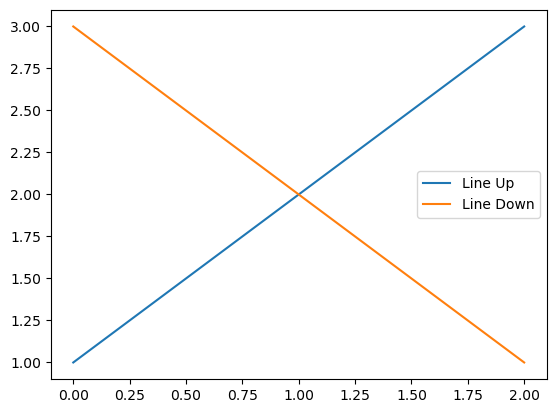

In [10]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line 2')
line_down, = ax.plot([3, 2, 1], label='Line 1')
ax.legend([line_up, line_down], ['Line Up', 'Line Down'])

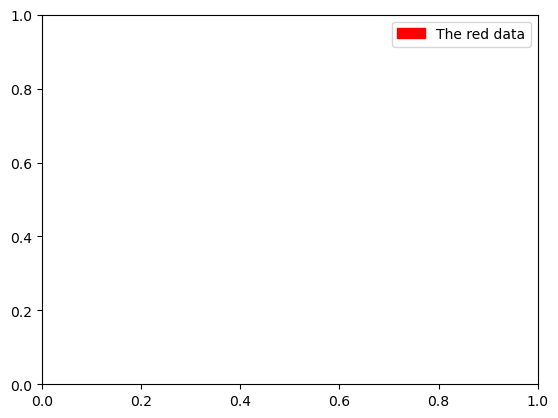

In [11]:
# 代理artists
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

fig, ax = plt.subplots()
red_patch = mpatches.Patch(color='red', label='The red data')
ax.legend(handles=[red_patch])

plt.show()

In [ ]:
import matplotlib.lines as mlines

fig, ax = plt.subplots()
blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars') # 空的line
ax.legend(handles=[blue_line])

plt.show()

In [ ]:
# bbox_to_anchor 设置legend的位置

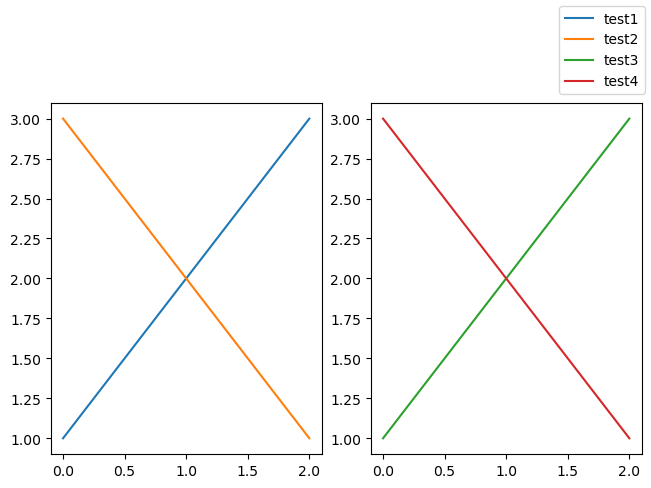

In [14]:
# Figure legends
fig, axs = plt.subplot_mosaic([['left', 'right']], layout='constrained')

axs['left'].plot([1, 2, 3], label="test1")
axs['left'].plot([3, 2, 1], label="test2")

axs['right'].plot([1, 2, 3], 'C2', label="test3")
axs['right'].plot([3, 2, 1], 'C3', label="test4")
# Place a legend to the right of this smaller subplot.
fig.legend(loc='outside upper right') # fig.legend()和ax.legend()的不同
# 使用ax的legend,可以区分不同的ax


### 非常有用的  .subplot_mosaic()

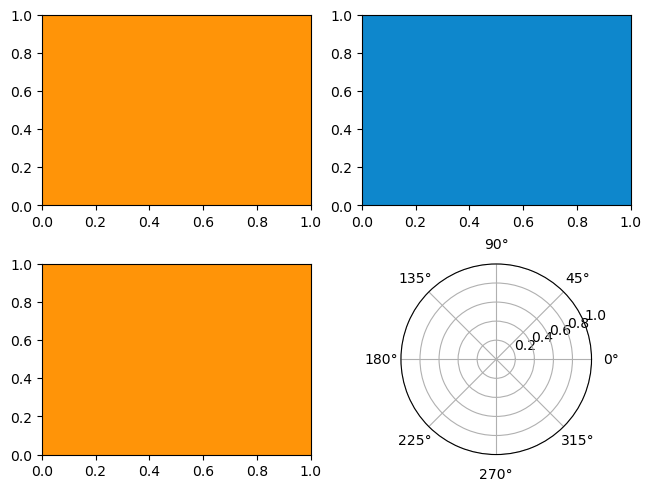

In [16]:
# 
axd = plt.figure(layout="constrained").subplot_mosaic(
    "AB;CD", # 设置subplot的位置
    subplot_kw={"facecolor": "xkcd:tangerine"}, 
    per_subplot_kw={
        "B": {"facecolor": "xkcd:water blue"},
        "D": {"projection": "polar", "facecolor": "w"}, #坐标系类型
    }
)


## Art
ists